# CS170A -- HW#3 -- assignment and solution form -- Octave

Your name:  ______________________

Your UID:  _________

<b>Please upload only this notebook to CCLE by the deadline.</b>

<b>Policy for late submission of solutions:</b>  We will use Paul Eggert's Late
Policy: $N$ days late $\Leftrightarrow$ $2^N$ points deducted}
The number of days late is $N=0$
for the first 24 hrs, $N=1$ for the next 24 hrs, etc., and if you submit
an assignment $H$ hours late, $2^{\lfloor \,H\,/\,24\, \rfloor}$ points are
deducted.

## Problem 1:  Fourier Music

Remember the $k$-th note in the the <b>equal-tempered scale</b> has frequency $c^k$ times the frequency of C,
where $c = 2^{1/12} = 1.059463\ldots$:

<table>
<tr><th> note  </th><th>  frequency (Hz)  </th><th>  frequency/C  </th><th>  interval </th></tr>
<tr><td>Middle C  </td><td>  261.63  </td><td>      $c^0 = 1.000$  </td><td>               ~ </td></tr>
<tr><td>       C#  </td><td>  277.18  </td><td>      $c^1 = 1.059$  </td><td>       minor 2nd </td></tr>
<tr><td>       D  </td><td>  293.66  </td><td>      $c^2 = 1.122$  </td><td>       major 2nd </td></tr>
<tr><td>       D#  </td><td>  311.13  </td><td>      $c^3 = 1.189$  </td><td>       minor 3rd </td></tr>
<tr><td>       E  </td><td>  329.63  </td><td>      $c^4 = 1.260$  </td><td>       major 3rd </td></tr>
<tr><td>       F  </td><td>  349.23  </td><td>      $c^5 = 1.334$  </td><td>             4th </td></tr>
<tr><td>       F#  </td><td>  369.99  </td><td>      $c^6 = 1.414$  </td><td>  diminished 5th </td></tr>
<tr><td>       G  </td><td>  392.00  </td><td>      $c^7 = 1.498$  </td><td>             5th </td></tr>
<tr><td>       G#  </td><td>  415.30  </td><td>      $c^8 = 1.587$  </td><td>       minor 6th </td></tr>
<tr><td>       A  </td><td>  440  </td><td>      $c^9 = 1.682$  </td><td>       major 6th </td></tr>
<tr><td>       A#  </td><td>  466.16  </td><td>   $c^{10} = 1.782$  </td><td>       minor 7th </td></tr>
<tr><td>       B  </td><td>  493.88  </td><td>   $c^{11} = 1.888$  </td><td>       major 7th </td></tr>
<tr><td>  High C  </td><td>  523.25  </td><td>   $c^{12} = 2.000$  </td><td>      octave/8th </td></tr>
</table>

The equal-tempered scale can be extended to higher or lower octaves by multiplying the frequencies in it by a power of 2.
(For example, the note 'A' occurs at frequencies 220, 440, 880, etc., because 440 = 2 $\times$ 220, 880 = 4 $\times$ 220, etc.

However, it is not right to call the frequency 660 = 3 $\times$ 220 an 'A';  the frequency 660 is
an 'E', because 600 = 2 $\times$ 330, and 330 is the frequency for 'E'.)  Only the frequencies $2^k \times 440$
(for integer $k$) are called 'A'.

Remember:  if a signal is sampled at frequency <tt>Fs</tt>,
then the <i>Nyquist frequency</i> at the end of this first half is <tt>Fs/2</tt>.
<!-- (after the work of Nyquist, who identified it around 1928).
The <tt>wavread()</tt> function will give you the sampling frequency <tt>Fs</tt> at which the music was rcorded.
-->

### 1.0 Read in the Mystery Tune

Read in the file <tt>mystery.wav</tt>, creating
a vector <tt>y</tt> that contains a sound track
(audio sequence) for the first few seconds of a mystery tune.

As discussed in class, if <tt>Fs</tt> is an integer sampling frequency.
In Octave and Matlab, executing <tt>sound(y, Fs)</tt> will play <tt>y</tt> at the frequency <tt>Fs</tt>.

Change <tt>y</tt> to contain only the first of the 2 stereo audio tracks.

In [7]:
[y Fs] = wavread('hw3/mystery.wav');

sound(y,Fs)   %  play the mystery tune

In [ ]:
y = y(:,1);   %  only keep the first track for this assignment

n = length(y)

### 1.1 The Fast Fourier Transform


The length of <tt>y</tt> is $n = 86000$.
Find the integer factors of $n$ by using the Matlab function <tt>factor()</tt>.

Then find out how much cpu time it takes to compute <tt>fft(y);</tt>

(To do this, run it 100 times and compute the average time required, using <tt>cputime</tt>.)


### 1.2 The Fast Fourier Transform?

First, define a new vector <tt>z</tt> that contains <tt>y(1:(n-13))</tt>.
Find the integer factors of $(n-13)$.

Find out how much cpu time it takes to compute <tt>fft(z);</tt> using the method above.

Explain the difference in timing; this is discussed on pp.235-236 of the Course Reader.

### 1.3 Plot the First Half of the Power Spectrum

Plot the frequency spectrum for <tt>y</tt>
by plotting the power of the 'first half' of the squared power of its Fourier transform,
using <tt>Fs</tt> as the sampling frequency.

Assume for this assignment that the <u><i>power</i></u> of a complex value $z$ is its <u>complex absolute value</u>:  i.e., $\mbox{power}(z) = |z| = \sqrt{z \, \bar{z}}$.

Here by <i>"first half"</i> of a sequence $s =[s_0, \ldots, s_{n-1}]$
we actually mean $[s_1, \ldots, s_m]$ where $m = \lfloor n/2 \rfloor$.
For example, the "first half" of $[0,1,2,3,4,5,6,7]$ is $[1,2,3,4]$.

To increase the information displayed by your plot, 
omit the very first element in the <tt>power</tt> vector
(which is just the sum of the data).

### 1.4 Write a script to find the top 10 Notes (corresponding to Spikes)

There are altogether about $(5 \times 12)+1 = 61$ notes in the equal-tempered scale with frequencies between low C (with frequency near 131) and the very high C with frequency near $131 \times 2^5 = 4192$.

Suppose we also define <b>dividing lines</b> between notes.
For example, C has frequency 261.63 and C# has frequency 271.18.
The dividing line between these two notes is $\Delta = (261.63+271.18)/2 = 266.40$.

Just as every note in the equal-tempered scale has frequency $c^k$ times the frequency of C,
we can define <b>equal tempered dividing lines</b> between all adjacent notes as having frequency $c^k$ times the frequency $\Delta$.

Write a Matlab function <tt>note_power(power,Fs)</tt> that distills a power spectrum vector <tt>power</tt> into an $61 \times 1$ vector that gives, for each equal-tempered note, the maximum value among all entries in the vector within the dividing lines above and below this note.
Find the top 10 notes (the 10 notes with highest power).

For the mystery clip, use your function to print the power value for each of these 10 notes.

### 1.5 Identify the Key, and find the relationship of the top 10 Notes to the Key

Find the note whose spike in the power spectrum is largest; this is called the <b>key</b>.

For each of the top 10 notes, compute the <b>ratio</b> of their frequency to that of the key.
Each ratio will be a power $c^k$; for each note, give the value of $k$.

A major fifth has a ratio $c^7$, which is approximately 3/2 -- the tonic/dominant ratio.

A minor fifth (diminished fifth) has a ratio $c^6$, which is approximately 1.4.

A major third has a ratio $c^4$, which is approximately 5/4 -- the ratio of harmony.


In [9]:
c = 2^(1/12)

major_third = c^4
minor_fifth = c^6
major_fifth = c^7

c =  1.0595
major_third =  1.2599
minor_fifth =  1.4142
major_fifth =  1.4983


## Problem 2: Sunspots

Sunspots have effects on power grids and communications on earth, and have had high intensity recently.
They often appear in the news, and
<a href="http://phys.org/news/2016-10-tracking-sunspots-solar-insight.html">there is a sunspot observatory at Big Bear near Los Angeles</a>.

In class we studied a classic example of Fourier analysis: determining the periodicity of sunspot data.
The plot of the data shows it is clearly periodic.

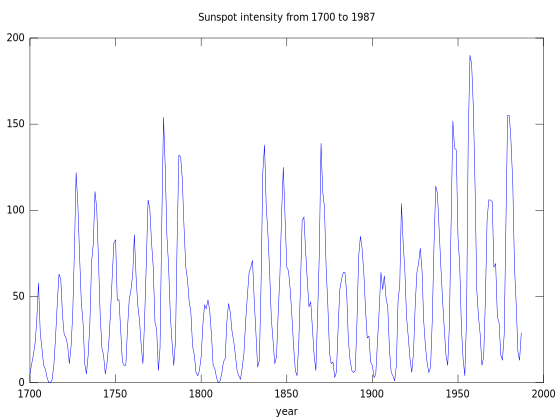

In [1]:
% sunspot activity from 1700 to 1987.

years = 1700 : 1987;
sunspots = [ ...
     5    11    16    23    36    58    29    20    10     8     3     0     0     2    11    27 ...
    47    63    60    39    28    26    22    11    21    40    78   122   103    73    47    35 ...
    11     5    16    34    70    81   111   101    73    40    20    16     5    11    22    40 ...
    60    81    83    48    48    31    12    10    10    32    48    54    63    86    61    45 ...
    36    21    11    38    70   106   101    82    67    35    31     7    20    93   154   126 ...
    85    68    39    23    10    24    83   132   131   118    90    67    60    47    41    21 ...
    16     6     4     7    15    34    45    43    48    42    28    10     8     3     0     1 ...
     5    12    14    35    46    41    30    24    16     7     4     2     9    17    36    50 ...
    64    67    71    48    28     9    13    57   122   138   103    86    65    37    24    11 ...
    15    40    62    99   125    96    67    65    54    39    21     7     4    23    55    94 ...
    96    77    59    44    47    31    16     7    38    74   139   111   102    66    45    17 ...
    11    12     3     6    32    54    60    64    64    52    25    13     7     6     7    36 ...
    73    85    78    64    42    26    27    12    10     3     5    24    42    64    54    62 ...
    49    44    19     6     4     1    10    47    57   104    81    64    38    26    14     6 ...
    17    44    64    69    78    65    36    21    11     6     9    36    80   114   110    89 ...
    68    48    31    16    10    33    93   152   136   135    84    69    32    14     4    38 ...
   142   190   185   159   112    54    38    28    10    15    47    94   106   106   105    67 ...
    69    38    35    16    13    28    93   155   155   140   116    67    46    18    13    29 ...
];

plot( years, sunspots, 'b' )
title('Sunspot intensity from 1700 to 1987')
xlabel('year')

We can use Fourier analysis to find the frequency of the cycles shown in the plot above.
Based on the script below, sunspots go through a cycle that has frequency (0.091/year) which is (1/(11 years)).
Thus the period of sunspot activity is about 11 years long.

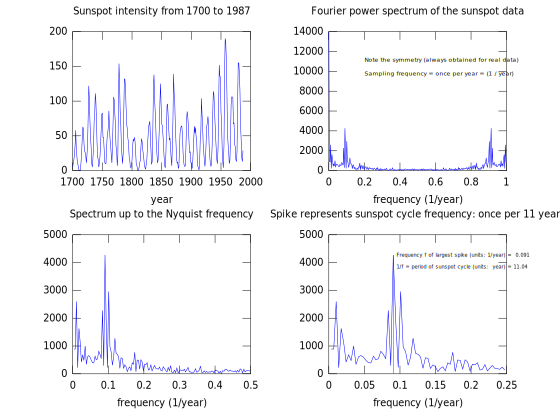

In [2]:
subplot(2,2,1)
plot( years, sunspots, 'b' )
title('Sunspot intensity from 1700 to 1987')
xlabel('year')

power_spectrum = abs(fft(sunspots));
n = length(sunspots);
sampling_frequency = 1;  %  one sample / year
frequencies = linspace( 0, sampling_frequency, n );

subplot(2,2,2)
plot( frequencies, power_spectrum, 'b' )
text( sampling_frequency/5, max(power_spectrum)*0.80, 'Note the symmetry (always obtained for real data)', 'fontsize', 6 )
text( sampling_frequency/5, max(power_spectrum)*0.70, 'Sampling frequency = once per year = (1 / year)', 'fontsize', 6 )
title( 'Fourier power spectrum of the sunspot data' )
xlabel('frequency (1/year)')

n_over_2 = floor(n/2);
subplot(2,2,3)
plot( frequencies(2:n_over_2), power_spectrum(2:n_over_2) )
title( 'Spectrum up to the Nyquist frequency' )
xlabel('frequency (1/year)')
% text( sampling_frequency/8, max(power_spectrum)*0.90, 'Nyquist frequency = sampling frequency / 2', 'fontsize', 6 )
% text( sampling_frequency/8, max(power_spectrum)*0.70, 'We ignore the 1st Fourier coefficient here;', 'fontsize', 6 )
% text( sampling_frequency/8, max(power_spectrum)*0.60, 'it is always just the sum of the input data.', 'fontsize', 6 )

search_interval = 2:floor(n/4);  %  skip the first coefficient, which is always the sum of the input data
spike_location = 1+find( power_spectrum(search_interval) == max(power_spectrum(search_interval)) );
spike_frequency = frequencies(spike_location);
period_of_sunspot_cycle = 1/spike_frequency;

subplot(2,2,4)
plot( frequencies(search_interval), power_spectrum(search_interval) )
text( spike_frequency*1.05, power_spectrum(spike_location)*1.00,
      sprintf('Frequency f of largest spike (units: 1/year) = %6.3f',spike_frequency), 'fontsize', 5 )
text( spike_frequency*1.05, power_spectrum(spike_location)*0.90,
      sprintf('1/f = period of sunspot cycle (units:  year) = %5.2f',period_of_sunspot_cycle), 'fontsize', 5 )
title( 'Spike represents sunspot cycle frequency: once per 11 years' )
xlabel('frequency (1/year)')
hold on
plot( [spike_frequency spike_frequency], [0 power_spectrum(spike_location)], 'r--' )
hold off

Sunspot data is available from WDC-SILSO, Belgian Royal Observatory, Brussels --
in the directory
<a href="http://www.sidc.be/silso/datafiles">http://www.sidc.be/silso/datafiles</a>,
which contains daily, monthly, and yearly sunspot indices:
<ul><li>
<b>yearly data</b> (since 1700) is in:
<a href="http://www.sidc.be/silso/DATA/SN_y_tot_V2.0.csv">http://www.sidc.be/silso/DATA/SN_y_tot_V2.0.csv</a>
</li><li>
<b>monthly data</b> (since 1749) is in:
<a href="http://www.sidc.be/silso/DATA/SN_m_tot_V2.0.csv">http://www.sidc.be/silso/DATA/SN_m_tot_V2.0.csv</a>
</li><li>
<b>daily data</b> (since 1818) is in:
<a href="http://www.sidc.be/silso/DATA/SN_d_tot_V2.0.csv">http://www.sidc.be/silso/DATA/SN_d_tot_V2.0.csv</a>
</li></ul>

### 2.0 Get the yearly and monthly data

Define a function to read in a .csv file across the network
using  <tt>urlread()</tt>, <tt>writefile()</tt>, and <tt>csvread()</tt>.

Use your function to read in the yearly, monthly, and daily data.

### 2.1 Compare the Belgian yearly sunspot data with the classical sunspot data

Is the yearly data close to the <tt>sunspots</tt> vector analyzed above? (up to 1987)
Find the L2-distance between the two vectors.

### 2.2 Analyze the yearly data

Find the period of yearly sunspot intensity, using analysis like that shown above.
Do the two values of the period agree?

### 2.3 Analyze the monthly data

Find the period of sunspot intensity using the <b>monthly</b> data.
At which frequencies are there spikes?

Remember, the sampling frequency here is (1/month) = (12/year).

Is there a period at a frequency that is close to the period for the yearly data?

### 2.4 Analyze the daily data

Find the period of sunspot intensity using the <b>daily</b> data.
At which frequencies are there spikes?

Remember, the sampling frequency here is (1/day) = (365.25/year).

Is there a period at a frequency that is close to the period for the yearly data?

## Problem 3:  A Photoshop Detector

A simple way to check if a $m \times n$ RGB image has been faked (with Photoshop, say) is to use the <tt>reshape</tt> function to convert it into a $(m\,n) \times 3$ matrix,
compute the 3 principal components of its $3 \times 3$ covariance matrix,
project the reshaped image on the <u>second</u> principal component,
and then reshape the result back to a $m \times n$ grayscale image.
If this grayscale image has bright or dark spots, it is possible that the color distribution in that area (and perhaps also that part of the image) has been altered.

For example, the image <tt>LIFE_projected_on_2nd_PC.jpg</tt> shows the result of projecting the image <tt>LIFE.jpg</tt> on the 2nd PC, and treating the result as a grayscale image.
Notice the flag on Aldrin's shoulder and some buttons on his suit are bright, suggesting that they have been retouched.  The buttons are bright red in <tt>LIFE.jpg</tt>.
<table>
<tr><td>
<img src="hw3/LIFE.jpg" style="height:400px;"/>LIFE magazine cover
</td><td>
<img src="hw3/LIFE_projected_on_2nd_PC.jpg" style="height:400px;"/>LIFE cover projected on 2nd PC
</td></tr>
</table>

### 3.1 Write a Photoshop detector

Write a function that takes the filename of an input image, and returns its 2nd PC image.

As a test, show the output of your program on <tt>LIFE.jpg</tt>.

(With Octave, you can include the output image in this notebook with a &lt;img src="..."&gt; HTML tag.)

### 3.2 Jennifer in Paradise

Show the output of your program on the photo <tt>Jennifer_in_Paradise.jpg</tt> included in the assignment .zip file.
This image is allegedly the first image ever actually photoshopped -- a photo of the wife of the original
developer of Photoshop,
<a href="http://www.telegraph.co.uk/technology/2016/02/05/the-most-famous-photoshopped-images-of-all-time/">
famous as a photoshopped image</a>.

### 3.3 Find and comment on an image of Hillary Clinton or Donald Trump that has been photoshopped

Using e.g. Google image search, find an image of Hillary or Donald whose 2nd PC has clearly highlighted areas.
Comment on the highlighting.

# Problem 4:  Graphs as Matrices

The goal of this problem is to analyze the graph (actually, a numeric matrix $H$).  You can read it from one of the attached files  <tt>hero_social_network_50.tsv</tt>, <tt>hero_social_network_50.m</tt>, <tt>hero_social_network_50.py</tt>.

This $H$ matrix represent a core part of Marvel's ___Hero Social Network___ (a graph of social connections between superheroes.  The entry $h_{ij}$ of $H$ is the strength of edges, so higher values mean that heroes $i$ and $j$ appear together more often.

The entire Marvel set of heroes is amazingly large; this dataset includes 206 heroes in the graph, obtained from the subset who appear in at least 50 comics.  Despite their frequent appearance, this matrix is still pretty sparse -- apparently superheroes don't have hundreds of friends.

### 4.0 Read in the Hero Social Network

For example, you can read the file with ___dlmread()___ in Matlab; in Python either ad hoc parsing or perhaps the ___csv___ module.

Notice that the network is undirected, so $H$ is real symmetric, and all entries of $H$ are nonnegative.

### 4.1 Eigenvalues

Compute the ___eigenvalues___ of $H$ and plot them -- so that the $i$-th eigenvalue $\lambda_i$ is plotted at position $(x,y) = (i, \lambda_i)$.

### 4.2 Largest Eigenvalue

Find the ___largest eigenvalue___ $r$ of $H$.  Is it equal to the ___spectral norm___ $||H||_2$?

### 4.3 Dominant Eigenvector

Find the ___eigenvector___ ___e___ of $H$ that has this largest eigenvalue.  Plot the sequence of entries of the eigenvector, showing that they are nonnegative.  Which entry $i$ has the largest value?  (Who is the $i$-th hero?)

### 4.4 Node Degree Sequence

The ___degree sequence___ is a vector $\bf d$ of integer values whose $i$-th entry $d_i$ is the _degree_ of the $i$-th node.  That is, $d_i$ is the number of other superheroes to which the $i$-th hero has nonzero edges.  Plot the sequence of degrees.  What is the name of the hero $i$ who has the largest value?

### 4.5 Graph Laplacian -- and Connected Components

Compute the ___graph laplacian___ $L = D - A$, where $D = diag({\bf d})$ is the diagonal matrix determined by the degree sequence, and $A$ is the zero-one adjacency matrix for $H$ (The entries of $A$ are zero wherever they are zero in $H$, and are one wherever nonzero in $H$.)

What is the number of zero eigenvalues of the graph laplacian $L$, if we assume that all eigenvalues whose absolute value is below 1e-10 are zero?  (This is supposed to be the number of connected components in the graph.)